<a href="https://colab.research.google.com/github/SatriaImawan12/Employee-Performance-Analysis-and-Prediction-System-Using-MLP-Classifier/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model Creation and Evaluation Summary**
* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

#**1. Load Pre-Processing Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


#**2. Define Independent and Dependent Features**

In [ ]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [ ]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [ ]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

#**3. Balancing Target Feature**

**SMOTE:** SMOTE (synthetic minority oversampling technique) adalah salah satu metode oversampling yang paling umum digunakan untuk mengatasi masalah ketidakseimbangan kelas. Metode ini bertujuan untuk menyeimbangkan distribusi kelas dengan meningkatkan secara acak contoh-contoh kelas minoritas dengan mereplikasinya. SMOTE mensintesis contoh-contoh baru kelas minoritas di antara contoh-contoh kelas minoritas yang ada.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


* Sekarang kolom target sudah seimbang.

#**4. Split Training and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [ ]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

#**5. Tujuan**


Membuat model terbaik dengan kriteria ***low bias*** dan ***low variance***.

Disini kita akan melakukan eksperimen pada 3 algoritma yang memiliki kemungkinan paling cocok
* **Support Vector Machine**
* **Random Forest**
* **Artificial Neural Network [MLP Classifier]**

#**6. Model Creation, Prediction, and Evaluation**


##**6.1 Support Vector Machine**

In [ ]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

###**6.1.1 Training Accuracy**

In [ ]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.51883643299952
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.95      0.97       725
           3       0.91      0.98      0.95       654
           4       0.99      0.97      0.98       718

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.96      2097
weighted avg       0.97      0.97      0.97      2097



* Support vector classifier memiliki performa yang baik di data training.

###**6.1.2 Testing Accuracy**

In [ ]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 93.71428571428572
Prcision Score: 94.04188571633729
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.94      0.96       193
           3       0.86      0.94      0.90       158
           4       0.96      0.93      0.95       174

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



###**6.1.3 Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pd.crosstab(svc_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,181,12,0
3,3,149,6
4,0,12,162


##**6.2 Random Forest**

In [ ]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

###**6.2.1 Training Accuracy**

In [ ]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



###**6.2.2 Testing Accuracy**




In [ ]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 95.80952380952381
Precision Score: 96.00273060552026
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       189
           3       0.90      0.97      0.93       161
           4       0.99      0.95      0.97       175

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



###**6.2.3 Hyper Parameter Tunning with Randomized Search CV**

In [ ]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['sqrt','log2',None] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 1577, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100}


In [ ]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)


###**6.2.4 Test Accuracy After Hyper Parameter Tunning**

In [ ]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 91.04761904761904
Classification report: 
               precision    recall  f1-score   support

           2       0.91      0.93      0.92       179
           3       0.86      0.90      0.88       165
           4       0.97      0.90      0.93       181

    accuracy                           0.91       525
   macro avg       0.91      0.91      0.91       525
weighted avg       0.91      0.91      0.91       525



* Setelah dilakukan hyper parameter tunning terlihat nilai accuracy semakin menurun.

###**6.2.3 Confussion Matrix**

In [ ]:
pd.crosstab(rf_clf1_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,167,11,1
3,13,148,4
4,4,14,163


##**6.3 Artificial Neural Network [MLP Classifier]**

In [ ]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [ ]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [ ]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[4.76348420e-04, 9.99520652e-01, 2.99918152e-06],
       [9.65196815e-06, 9.99724620e-01, 2.65727819e-04],
       [9.67566919e-01, 3.23473988e-02, 8.56819550e-05],
       ...,
       [9.89306476e-01, 1.06918843e-02, 1.64006280e-06],
       [9.45257074e-01, 5.46470847e-02, 9.58417440e-05],
       [1.83946130e-21, 3.60932692e-10, 1.00000000e+00]])

In [ ]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

###**6.3.1 Training Accuracy**

In [ ]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 98.9031950405341
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.97      0.98       713
           3       0.97      1.00      0.98       678
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



###**6.3.2 Testing Accuracy**

In [ ]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Precision Score:",precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 95.61904761904762
Precision Score: 95.8960144500122
Classification report of testing:
               precision    recall  f1-score   support

           2       0.99      0.96      0.98       190
           3       0.89      0.97      0.93       158
           4       0.98      0.93      0.96       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



###**6.3.3 Confussion Matrix**

In [ ]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,183,7,0
3,1,154,3
4,0,12,165


##**6.4 Confussion Matrix of All Models**

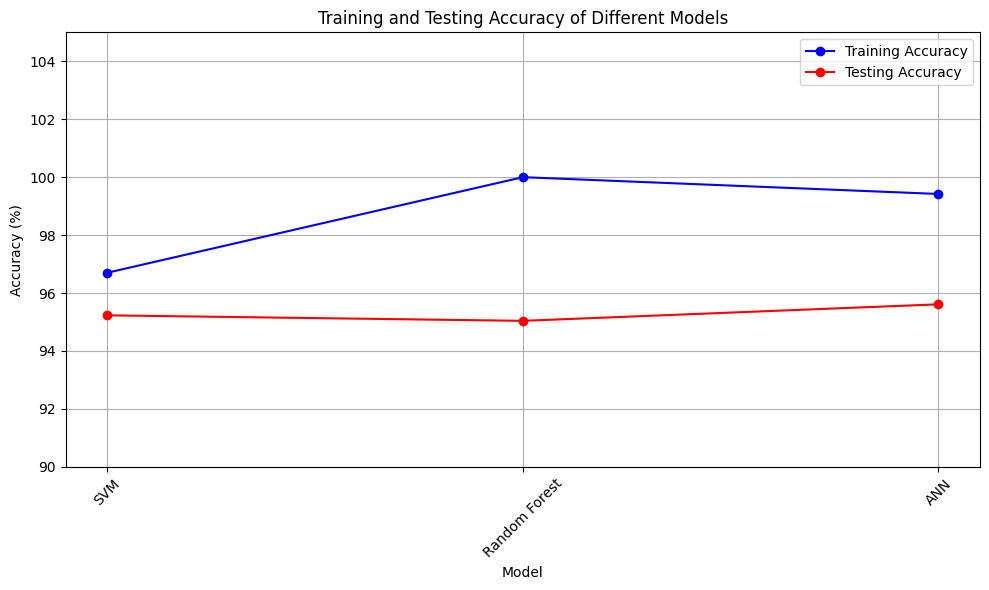

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Random Forest', 'ANN']

# Training accuracies
training_accuracies = [96.70, 100, 99.42]

# Testing accuracies
testing_accuracies = [95.23, 95.04, 95.61]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

# Plot testing accuracies
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)  # Setting y-axis limit
plt.legend()
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#**7. Kesimpulan**

1. Support Vector Machine:
   * Training Accuracy: 96.70%
   * Testing Accuracy: 95.23%
2. Random Forest:
   * Training Accuracy: 100%
   * Testing Accuracy: 95.04% (decreased after hyperparameter tuning)
3. Artificial Neural Network (Multilayer Perceptron):
   * Training Accuracy: 99.42%
   * Testing Accuracy: 95.61%
   
Di antara model-model tersebut, Artificial Neural Network (Multilayer Perceptron) terlihat lebih baik dibandingkan model lainnya, karena mempunyai akurasi yang tinggi baik pada training data maupun test data, dengan akurasi training sebesar 99,42% dan akurasi test sebesar 95,61% dengan skor presisi 95,97%. Model ini mencapai keseimbangan yang baik antara akurasi pelatihan yang tinggi dan akurasi pengujian yang kuat, membuatnya menjadi kandidat kuat sebagai model "sweet spot".


#**8. Menyimpan Model Terbaik**

In [ ]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)